In [1]:
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
from gensim.models import LdaModel
import pandas as pd
import ecopy as ep
import seaborn as sns
import json
from scipy import stats
from scipy.stats import t
import pingouin as pg

/home/mashrekur/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/mashrekur/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
nTopics = 45

In [3]:
topic_names = [
'Water Quality',
'Sediment Transport',
'Wastewater Treatment',
'Flood Risk & Assessment',
'Hydrogeology',
'Coastal Hydrology', 
'River Flow',
'Wetland & Ecology',
'Runoff Quality',
'Rainfall-Runoff',
'Urban Drainage',
'Systems Hydrology',
'Surface-GW Interactions',
'Irrigation Water Management',
'Drought & Water Scarcity',
'Climate Change Impacts',
'Gauging & Monitoring',
'Forecasting',
'Glaciology',
'Salinity',
'Peatlands Mapping & Monitoring',
'Spatial Variability',
'Land Surface Flux',
'Solute Transport',
'Water Resources Management',
'Numerical Modeling',
'Hydrochemistry',
'Pollutant Removal',
'Groundwater Recharge',
'Uncertainty',
'Land Cover',
'Modeling & Calibration',
'Soil Moisture',
'Water Storage & Budgeting',
'Aquifers & Abstraction',
'Microbiology',
'Streamflow',
'Erosion',
'Dynamic Processes',
'Temporal Variability',
'Spatial Variability of Precipitation',
'Rainfall Intensity & Measurement',
'Watershed Hydrology',
'Hydraulics',
'Quantitative Analysis',
]

In [4]:
topic_names_short = [
'WQ',
'SDT',
'WT',
'FRA',
'HG',
'CH', 
'RF',
'WE',
'RQ',
'RR',
'UD',
'SH',
'SGW',
'IWM',
'DWS',
'CC',
'GM',
'FC',
'GL',
'SN',
'PM',
'SV',
'LSF',
'SLT',
'WRM',
'NM',
'HC',
'PR',
'GWR',
'UC',
'LC',
'MDC',
'SM',
'WSB',
'AA',
'MCB',
'SF',
'ER',
'DP',
'TV',
'SVP',
'RIM',
'WH',
'HDR',
'QA',
]

In [5]:
# Define colors to associate with each topic
custom_colors = {
 'burlywood': '#DEB887',
 'chocolate': '#D2691E',
 'crimson': '#DC143C',
 'darkgreen': '#006400',
 'darkorange': '#FF8C00',
 'darkslategrey': '#2F4F4F',
 'deepskyblue': '#00BFFF',
 'dimgray': '#696969',
 'firebrick': '#B22222',
 'gold': '#FFD700',
 'goldenrod':'#DAA520',
 'lawngreen':'#7CFC00',
 'rosybrown':'#BC8F8F',
 'mediumslateblue':'#7B68EE',
 'mediumvioletred': '#C71585',
 'orangered': '#FF4500',
 'orchid': '#DA70D6',
 'royalblue': '#4169E1',
 'slateblue': '#6A5ACD',
 'springgreen': '#00FF7F',
 'steelblue': '#4682B4',
 'teal': '#008080',
 'turquoise': '#40E0D0',
 'chamoisee': '#A0785A',
 'blueviolet': '#8A2BE2',
 'yellowgreen': '#9ACD32',
 'cadmiumred': '#E30022',
 'royalblue': '#4169E1',
 'americanrose':  '#FF033E',
 'asparagus': '#87A96B',
 'coral':'#FF7F50',
 'magenta':'#FF00FF',
 'cadet':'#536872',
 'navy':'#000080',
 'bondiblue':'#0095B6',
 'blue':'#0000FF',
 'boysenberry':'#873260',
 'khaki':'#F0E68C',
 'cgblue':'#007AA5',
#  'linen':'#FAF0E6',
 'byzantine':'#BD33A4',
 'palevioletred':'#DB7093',
 'sienna':'#A0522D',
 'mediumspringgreen':'#00FA9A',
 'indianred':'#CD5C5C',
 'tomato': '#FF6347',
 'darkcyan': '#008B8B',
    
}

# turn into a list
colorlist = []
for i, color in enumerate(custom_colors.values()):
    colorlist.append(tuple(int(color.lstrip('#')[i:i+2], 16) for i in (0, 2, 4)))
    colorlist[i] = (colorlist[i][0] / 256, colorlist[i][1] / 256, colorlist[i][2] / 256)

In [6]:
# color_key_dict = {
# 'Water Quality':'burlywood',
# 'Sediment Transport':'chocolate',
# 'Wastewater Treatment':'crimson',
# 'Flood Risk & Assessment':'darkgreen',
# 'Hydrogeology':'darkorange',
# 'Coastal Hydrology':'darkslategrey', 
# 'River Flow':'deepskyblue',
# 'Wetland & Ecology':'dimgray',
# 'Runoff Quality':'firebrick',
# 'Rainfall-Runoff':'gold',
# 'Urban Drainage':'goldenrod',
# 'Systems Hydrology':'lawngreen',
# 'Surface-GW Interactions':'rosybrown',
# 'Irrigation Water Management':'mediumslateblue',
# 'Drought & Water Scarcity':'mediumvioletred',
# 'Climate Change Impacts':'orangered',
# 'Gauging & Monitoring':'orchid',
# 'Forecasting':'royalblue',
# 'Glaciology':'slateblue',
# 'Salinity':'springgreen',
# 'Peatlands Mapping & Monitoring':'steelblue',
# 'Spatial Variability':'teal',
# 'Land Surface Flux':'turquoise',
# 'Solute Transport':'yellow',
# 'Water Resources Management':'blueviolet',
# 'Numerical Modeling':'yellowgreen',
# 'Hydrochemistry':'mistyrose',
# 'Pollutant Removal':'royalblue',
# 'Groundwater Recharge':'lavender',
# 'Uncertainty':'seashell',
# 'Land Cover':'coral',
# 'Modeling & Calibration':'magenta',
# 'Soil Moisture':'moccasin',
# 'Water Storage & Budgeting':'navy',
# 'Aquifers & Abstraction':'paleturquoise',
# 'Microbiology':'aliceblue',
# 'Streamflow':'azure',
# 'Erosion':'khaki',
# 'Dynamic Processes':'lightseagreen',
# 'Temporal Variability':'linen',
# 'Spatial Variability of Precipitation':'palevioletred',
# 'Rainfall Intensity & Measurement':'sienna',
# 'Watershed Hydrology':'mediumspringgreen',
# 'Hydraulics':'indianred',
# 'Quantitative Analysis':'tomato',
# }



In [7]:
# Load model

lda_model = LdaModel.load(f'trained_models/trained_lda_model_new_{nTopics}')



# Load topic distributions

topic_distributions = np.load(f'data/topic_distributions_broad_{lda_model.num_topics}.npy')



# Pull topics

topics = lda_model.show_topics(formatted=False, num_topics=nTopics, num_words=20)



# load raw corpus dataframe

with open('data/raw_corpus_broad.pkl', 'rb') as f:
    corpus_df = pkl.load(f)

/home/mashrekur/anaconda3/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/home/mashrekur/anaconda3/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.10, the latest is 0.3.11.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [8]:
# Pull journals

journals = corpus_df.Journal.unique()



# Pull years

years = np.unique(corpus_df['Year'])

In [9]:
#count number of zero elements in topic_distributions

df_zero = pd.DataFrame(topic_distributions)


print('Non-Zero Elements:',np.count_nonzero(df_zero))
print('Zero Elements:',((74479 * 45) - np.count_nonzero(df_zero)))
print('Percentage of Zero Elements:',(((74479 * 45) - np.count_nonzero(df_zero))/(74479 * 45))*100,'%')
    

Non-Zero Elements: 703598
Zero Elements: 2647957
Percentage of Zero Elements: 79.006819222719 %


In [10]:
# Create a dictionary of topic distributions by year
#topic_distributions_year['Year'][paper][topic_weights]

topic_distributions_year = {}

for y, year in enumerate(years):
    
    topic_distributions_year[year] = topic_distributions[corpus_df['Year'] == year]



In [11]:
# Create a dictionary of topic distributions by journal
# topic_distributions_journal['Journal'][paper][topic_weights]

topic_distributions_journal = {}

for j, journal in enumerate(journals):
    
    topic_distributions_journal[journal] = topic_distributions[corpus_df['Journal'] == journal]
    

In [12]:
# Create a dictionary of topic distributions by year & journal
# topic_distributions_journal_year['Journal']['Year]'[paper][topic_weights]

topic_distributions_journal_year = {}

for j, journal in enumerate(journals):
    
    topic_distributions_journal_year[journal] = {}
    
    for y, year in enumerate(years):
        
        topic_distributions_journal_year[journal][year] = topic_distributions[(corpus_df['Journal'] == journal) & (corpus_df['Year'] == year)]



In [13]:
# Define a list of diversity metrics for ecopy

diversity_metrics = ['shannon', 'spRich', 'gini-simpson', 'dominance']
diversity_metrics_3 = ['shannon', 'spRich', 'dominance']

In [14]:
# Global diversity metrics
#global_diversity['metric'][paper_diversities]


global_diversity = {}

for metric in diversity_metrics:
    
    global_diversity[metric] = ep.diversity(topic_distributions, method = metric, breakNA=False, num_equiv=False)



In [15]:
# Yearwise diversity metric
# year_diversity['metric']['year'][paper_diversities]

year_diversity = {}


for metric in diversity_metrics:
    
    year_diversity[metric] = {}
    
    for y, year in enumerate(years):
        
        year_diversity[metric][year] = ep.diversity(topic_distributions_year[year], method = metric, breakNA=False, num_equiv=False)



In [16]:
for year in years: 
    year_diversity['shannon'][year] 

In [17]:
# Journalwise diversity metric
# year_diversity['metric']['journal'][paper_diversities]

journal_diversity = {}

for metric in diversity_metrics:
    
    journal_diversity[metric] = {}
    
    for j, journal in enumerate(journals):
        
        journal_diversity[metric][journal] = ep.diversity(topic_distributions_journal[journal], method = metric, breakNA=False, num_equiv=False)

In [18]:
# #Journal-year diversity metric

journal_year_diversity = {}

for metric in diversity_metrics:
    
    journal_year_diversity[metric] = {}
    
    for j, journal in enumerate(journals):
        
        journal_year_diversity[metric][journal] = {}
        
        for y, year in enumerate(years):
            
            if topic_distributions_journal_year[journal][year].size > 0:
                
                journal_year_diversity[metric][journal][year] = ep.diversity(topic_distributions_journal_year[journal][year], method = metric, breakNA=False, num_equiv=False)

In [19]:
journal_year_mean_diversity = {}

for metric in diversity_metrics:
    
    journal_year_mean_diversity[metric] = {}
    
    for j, journal in enumerate(journals):
        
        journal_year_mean_diversity[metric][journal] = {}
        
        for y, year in enumerate(years):
            #since some journal data are missing for some years
            if topic_distributions_journal_year[journal][year].size > 0:
                
                journal_year_mean_diversity[metric][journal][year] = np.mean(journal_year_diversity[metric][journal][year])

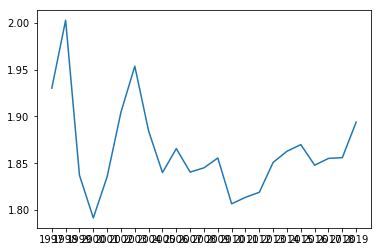

In [20]:
plt.plot(journal_year_mean_diversity['shannon']['HESS'].keys(), journal_year_mean_diversity['shannon']['HESS'].values())

In [21]:
np.array(list(journal_year_mean_diversity['shannon']['WRR'].keys()))

array(['1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019'], dtype='<U4')

In [22]:
#Are the paper diversities in each journal increasing?
fig = plt.figure(figsize=(150,75), facecolor='white')
# plt.title('Mean Shannon Diversity Per Journal Per Year', fontsize = 400)

# plot numbering starts at 1, not 0
plot_number = 1

for journal in journals:

    ax = fig.add_subplot(6, 3, plot_number)
    ax.plot(journal_year_mean_diversity['shannon'][journal].keys(), journal_year_mean_diversity['shannon'][journal].values(), linewidth = 50, color = list(custom_colors.keys())[plot_number])
    ax.tick_params(axis="x", labelsize=50)
    ax.tick_params(axis="y", labelsize=25)
#     ax.set_ylim(1.2,2.0)
    plt.xticks(rotation=45)
    ax.set_title(journal, size = 100)
#     ax.set_xlim(0,29)
    ax.grid()

    # Go to the next plot for the next loop
    plot_number = plot_number + 1

plt.tight_layout()
plt.savefig('figures/mean_shannon_per_journal_per_year.png') 

In [2]:
#calculate statistical significance of trends in per-article journal diversity

# y_list = [*range(0, len(journal_year_mean_diversity['shannon']['WRI'].values()), 1)]

# print('WRI')
# pg.corr(np.array(y_list)[:-1], np.array(list(journal_year_mean_diversity['shannon']['WRI'].values())[:-1]))



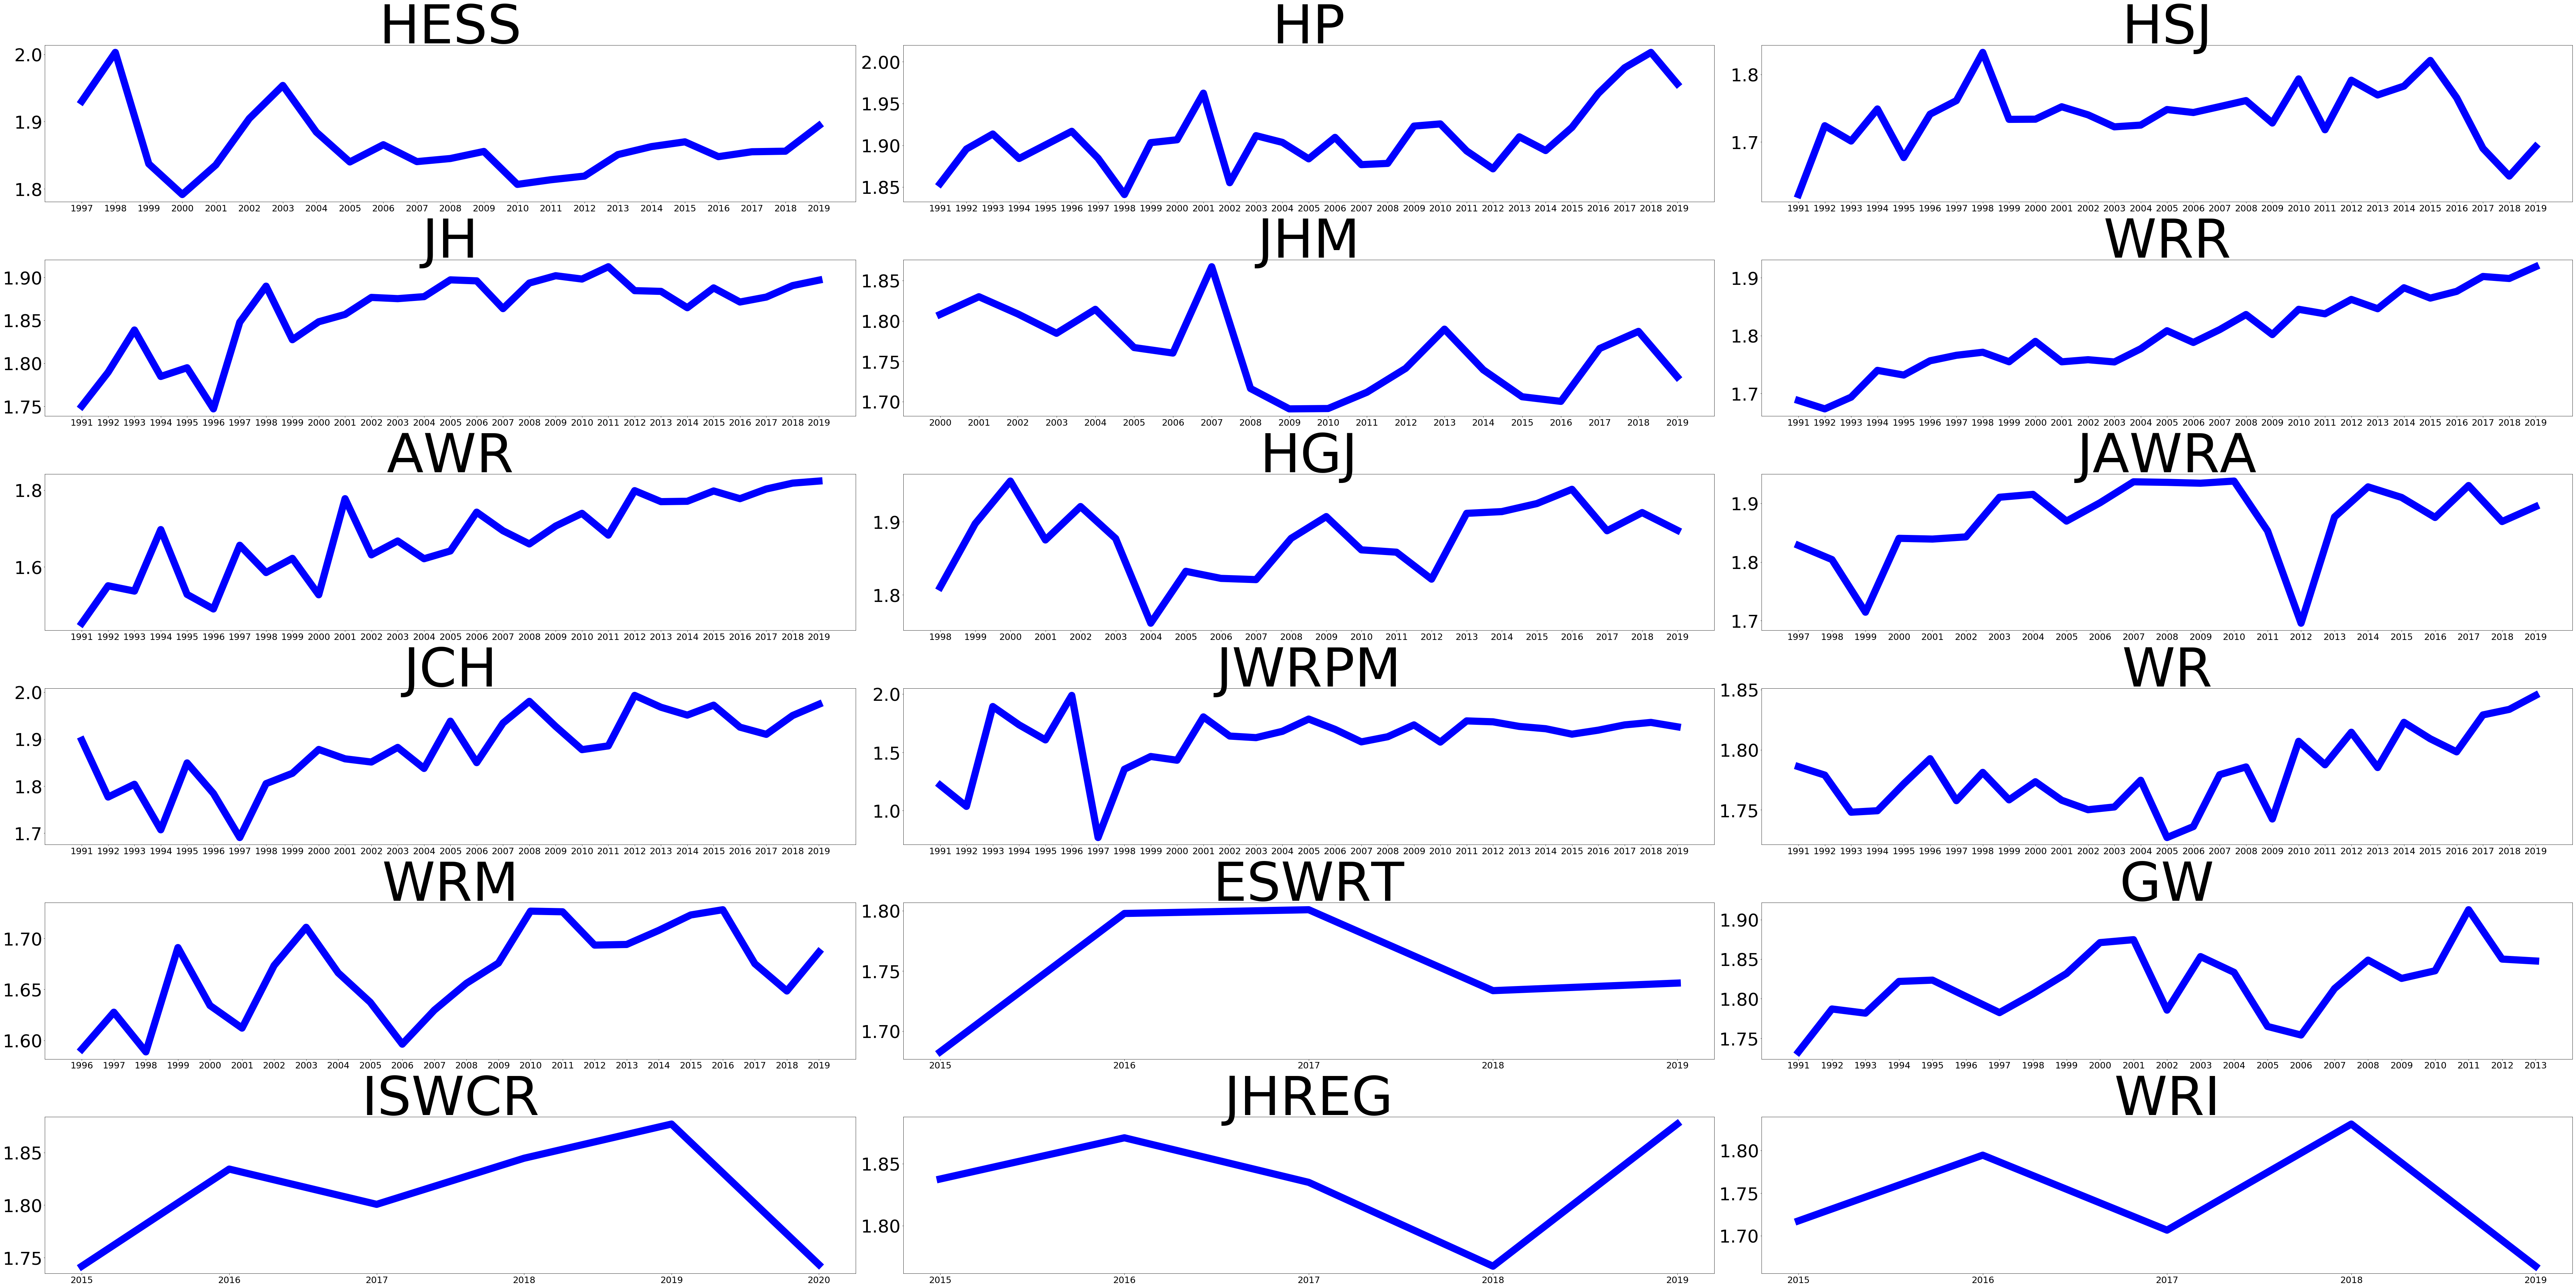

In [24]:
#Are the paper diversities in each journal increasing?
fig = plt.figure(figsize=(100,50), facecolor='white')
# plt.title('Mean Shannon Diversity Per Journal Per Year', fontsize = 400)

# plot numbering starts at 1, not 0
plot_number = 1

for journal in journals:

    ax = fig.add_subplot(6, 3, plot_number) #, sharex = ax
    ax.plot(journal_year_mean_diversity['shannon'][journal].keys(), journal_year_mean_diversity['shannon'][journal].values(), linewidth = 20, color = 'blue')
    ax.tick_params(axis="x", labelsize=25)
    ax.tick_params(axis="y", labelsize=50)
#     ax.set_ylim(1.2,2.0)
    ax.set_title(journal, size = 150)
    # Go to the next plot for the next loop
    plot_number = plot_number + 1

plt.tight_layout()
plt.savefig('figures/mean_shannon_per_journal_per_year_sharex.png') 

In [25]:
journal_year_mean_diversity['shannon']

{'HESS': {'1997': 1.930271208506083,
  '1998': 2.0028630369225375,
  '1999': 1.8372072722665576,
  '2000': 1.7916068596971226,
  '2001': 1.835580273440836,
  '2002': 1.9046336753621758,
  '2003': 1.953735399070908,
  '2004': 1.8844109345008326,
  '2005': 1.8400153647375839,
  '2006': 1.8656570632982112,
  '2007': 1.8405531664732386,
  '2008': 1.8451435292309268,
  '2009': 1.8556450751268987,
  '2010': 1.806698935165948,
  '2011': 1.8135899774576671,
  '2012': 1.8190171992916453,
  '2013': 1.8509633033701656,
  '2014': 1.8628478453626587,
  '2015': 1.8699429866428887,
  '2016': 1.8479269932955542,
  '2017': 1.8551965585877894,
  '2018': 1.8560330307408432,
  '2019': 1.8939512124435107},
 'HP': {'1991': 1.8542405899890642,
  '1992': 1.8955434277410554,
  '1993': 1.9135122432066898,
  '1994': 1.8841862847919724,
  '1995': 1.9004466181601607,
  '1996': 1.9167604531057305,
  '1997': 1.8844135278618612,
  '1998': 1.8410467070154322,
  '1999': 1.9031876921835271,
  '2000': 1.906615024667186,


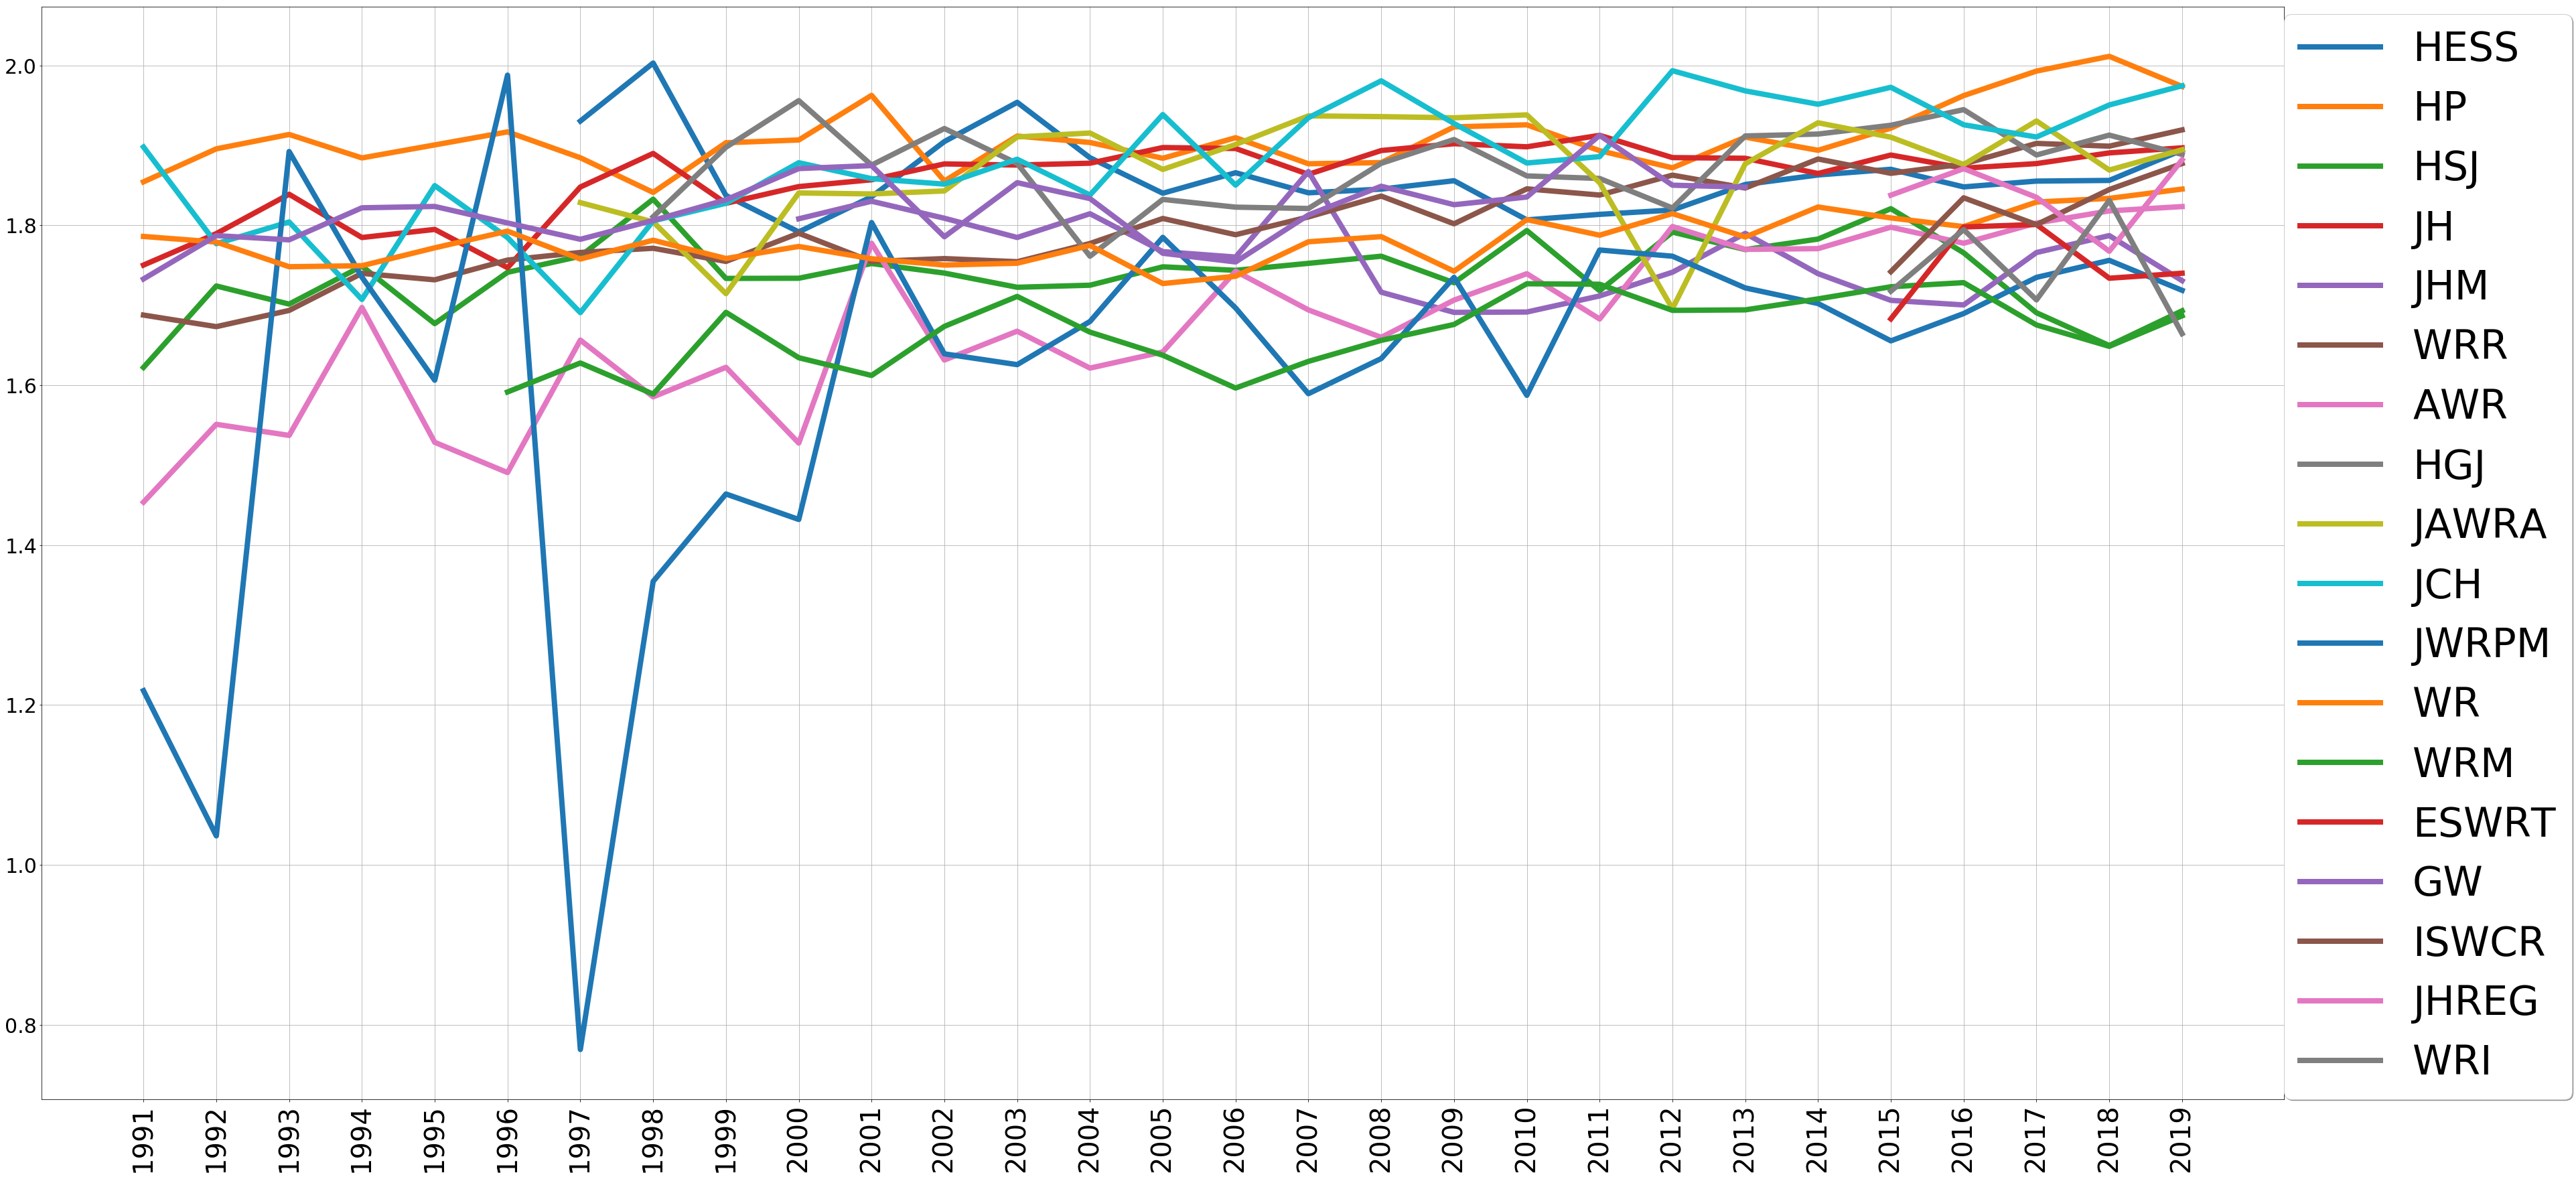

In [26]:
df = pd.DataFrame(journal_year_mean_diversity['shannon'])
plt.figure(figsize=(60,30))
plt.plot(df[:-1], linewidth = 8)
plt.xticks(size = 40, rotation=90)
plt.yticks(size = 30)
plt.legend(df, prop={'size': 60}, loc =(1,0), shadow = True, fancybox = True)
plt.grid()

plt.savefig('figures/mean_diversity_journal_sharedplot.png')

In [27]:
# #creating proxy artist for legends        
# labels = list(color_key_dict.keys())
# handles = [plt.Rectangle((0,0),1,1, color=color_key_dict[label]) for label in labels]
# plt.axis('off')
# plt.legend(handles, labels, shadow = True, fancybox = True, prop={'size': 20})
# plt.savefig('figures/legends.png')  


In [28]:
# Calculate r values per metric and plotting them.


r_vals_global = {}


for metric in diversity_metrics_3:
    
    r_vals_global[metric] = {}
    
    for t, topic in enumerate(topic_names):

        r_vals_global[metric][topic] = np.corrcoef(topic_distributions[:,t],global_diversity[metric])[0,1]


fig = plt.figure(figsize=(150,100), facecolor='white')


# plot numbering starts at 1, not 0
plot_number = 1

# for metric in diversity_metrics:
ax = fig.add_subplot(1, 1, plot_number)
ax.bar(topic_names, r_vals_global['shannon'].values(), color = list(custom_colors.values()))
ax.tick_params(axis="x", labelsize=100)
ax.tick_params(axis="y", labelsize=100)
ax.set_ylim(-0.3,0.3)
ax.set_title('R-values for Statistical Relationship Between Per-Article Shannon Diversity & Topic Distributions', size = 150)
# Go to the next plot for the next loop
plot_number = plot_number + 1
plt.xticks(rotation = 90)
ax.grid()

plt.tight_layout()
plt.savefig('figures/r_shannon_fullcorpus.png')    

In [44]:
r_vals_global['shannon']

{'Water Quality': 0.07233839043199307,
 'Sediment Transport': 0.10400194455566111,
 'Wastewater Treatment': 0.014880449371370388,
 'Flood Risk & Assessment': 0.02816961499326077,
 'Hydrogeology': 0.06533654957972451,
 'Coastal Hydrology': 0.12036827864189448,
 'River Flow': 0.1626725799703894,
 'Wetland & Ecology': 0.13483488305320865,
 'Runoff Quality': 0.18555911087008944,
 'Rainfall-Runoff': 0.11347206817940661,
 'Urban Drainage': 0.1251864331352305,
 'Systems Hydrology': -0.15651663004864427,
 'Surface-GW Interactions': -0.0233272000969254,
 'Irrigation Water Management': 0.026801077015110458,
 'Drought & Water Scarcity': -0.0016614711719343319,
 'Climate Change Impacts': -0.03000286074951206,
 'Gauging & Monitoring': 0.09069623625027794,
 'Forecasting': -0.15209639978327258,
 'Glaciology': 0.016714216282513177,
 'Salinity': 0.08922713637747239,
 'Peatlands Mapping & Monitoring': 0.0712578529113092,
 'Spatial Variability': 0.0749867880603434,
 'Land Surface Flux': 0.056668742322744

In [29]:
#Create a dictionary of [metric][journal][topic][weights]
journal_diversity_correlation_dict = {}


    
for metric in diversity_metrics:

    journal_diversity_correlation_dict[metric] = {}

    for j, journal in enumerate(journals):

        journal_diversity_correlation_dict[metric][journal] = {}

        
        for t, topic in enumerate(topic_names):

            journal_diversity_correlation_dict[metric][journal][topic] = np.corrcoef(topic_distributions_journal[journal][:,t],journal_diversity[metric][journal])[0,1]
            
            



In [30]:
# fig = plt.figure(figsize=(250,150), facecolor='white')


# # plot numbering starts at 1, not 0
# plot_number = 1

# for journal in journals:
#     ax = fig.add_subplot(6, 3, plot_number)
#     ax.bar(topic_names_short, journal_diversity_correlation_dict['shannon'][journal].values(), color = list(custom_colors.values()))
#     ax.tick_params(axis="x", labelsize=50)
#     ax.tick_params(axis="y", labelsize=100)
#     ax.set_ylim(-0.5,0.4)
#     ax.set_title(journal, size = 150)
#     # Go to the next plot for the next loop
#     plot_number = plot_number + 1

# plt.tight_layout()
# plt.savefig('figures/r_shannon_alljournals.png')    

In [31]:
# fig = plt.figure(figsize=(250,150), facecolor='white')


# # plot numbering starts at 1, not 0
# plot_number = 1

# for journal in journals:
#     ax = fig.add_subplot(6, 3, plot_number)
#     ax.bar(topic_names_short, journal_diversity_correlation_dict['gini-simpson'][journal].values(), color = list(custom_colors.values()))
#     ax.tick_params(axis="x", labelsize=50)
#     ax.tick_params(axis="y", labelsize=100)
#     ax.set_ylim(-0.5,0.4)
#     ax.set_title(journal, size = 150)
#     # Go to the next plot for the next loop
#     plot_number = plot_number + 1

# plt.tight_layout()
# plt.savefig('figures/r_gini_alljournals.png')    

In [32]:
# fig = plt.figure(figsize=(250,150), facecolor='white')


# # plot numbering starts at 1, not 0
# plot_number = 1

# for journal in journals:
#     ax = fig.add_subplot(6, 3, plot_number)
#     ax.bar(topic_names_short, journal_diversity_correlation_dict['spRich'][journal].values(), color = list(custom_colors.values()))
#     ax.tick_params(axis="x", labelsize=50)
#     ax.tick_params(axis="y", labelsize=100)
#     ax.set_ylim(-0.5,0.4)
#     ax.set_title(journal, size = 150)
#     # Go to the next plot for the next loop
#     plot_number = plot_number + 1

# plt.tight_layout()
# plt.savefig('figures/r_sprich_alljournals.png')    

In [33]:
# fig = plt.figure(figsize=(250,150), facecolor='white')


# # plot numbering starts at 1, not 0
# plot_number = 1

# for journal in journals:
#     ax = fig.add_subplot(6, 3, plot_number)
#     ax.bar(topic_names_short, journal_diversity_correlation_dict['dominance'][journal].values(), color = list(custom_colors.values()))
#     ax.tick_params(axis="x", labelsize=50)
#     ax.tick_params(axis="y", labelsize=100)
#     ax.set_ylim(-0.5,0.4)
#     ax.set_title(journal, size = 150)
#     # Go to the next plot for the next loop
#     plot_number = plot_number + 1

# plt.tight_layout()
# plt.savefig('figures/r_dominance_alljournals.png')    

In [34]:
#Create a dictionary of [metric][journal][topic][weights]
year_diversity_correlation_dict = {}


    
for metric in diversity_metrics:

    year_diversity_correlation_dict[metric] = {}

    for y, year in enumerate(years):

        year_diversity_correlation_dict[metric][year] = {} 

        
        for t, topic in enumerate(topic_names):

            year_diversity_correlation_dict[metric][year][topic] = np.corrcoef(topic_distributions_year[year][:,t],year_diversity[metric][year])[0,1]
            

/home/mashrekur/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/mashrekur/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [35]:
# fig = plt.figure(figsize=(250,150), facecolor='white')


# # plot numbering starts at 1, not 0
# plot_number = 1

# for year in years:
#     ax = fig.add_subplot(6, 5, plot_number)
#     ax.bar(topic_names_short, year_diversity_correlation_dict['shannon'][year].values(), color = list(custom_colors.values()))
#     ax.tick_params(axis="x", labelsize=25)
#     ax.tick_params(axis="y", labelsize=100)
#     ax.set_ylim(-0.5,0.5)
#     ax.set_title(year, size = 150)
#     # Go to the next plot for the next loop
#     plot_number = plot_number + 1

# plt.tight_layout()
# plt.savefig('figures/r_shannon_allyears.png')    

In [36]:
#list of isolated topics 

isolated_list = [
'Pollutant Removal',
'Modeling & Calibration',
'Forecasting',
'Surface-GW Interactions',
'Numerical Modeling',
'Uncertainty',
'Systems Hydrology',
'Water Resources Management',
'Climate Change Impacts',
'Solute Transport',
'Hydraulics'
]

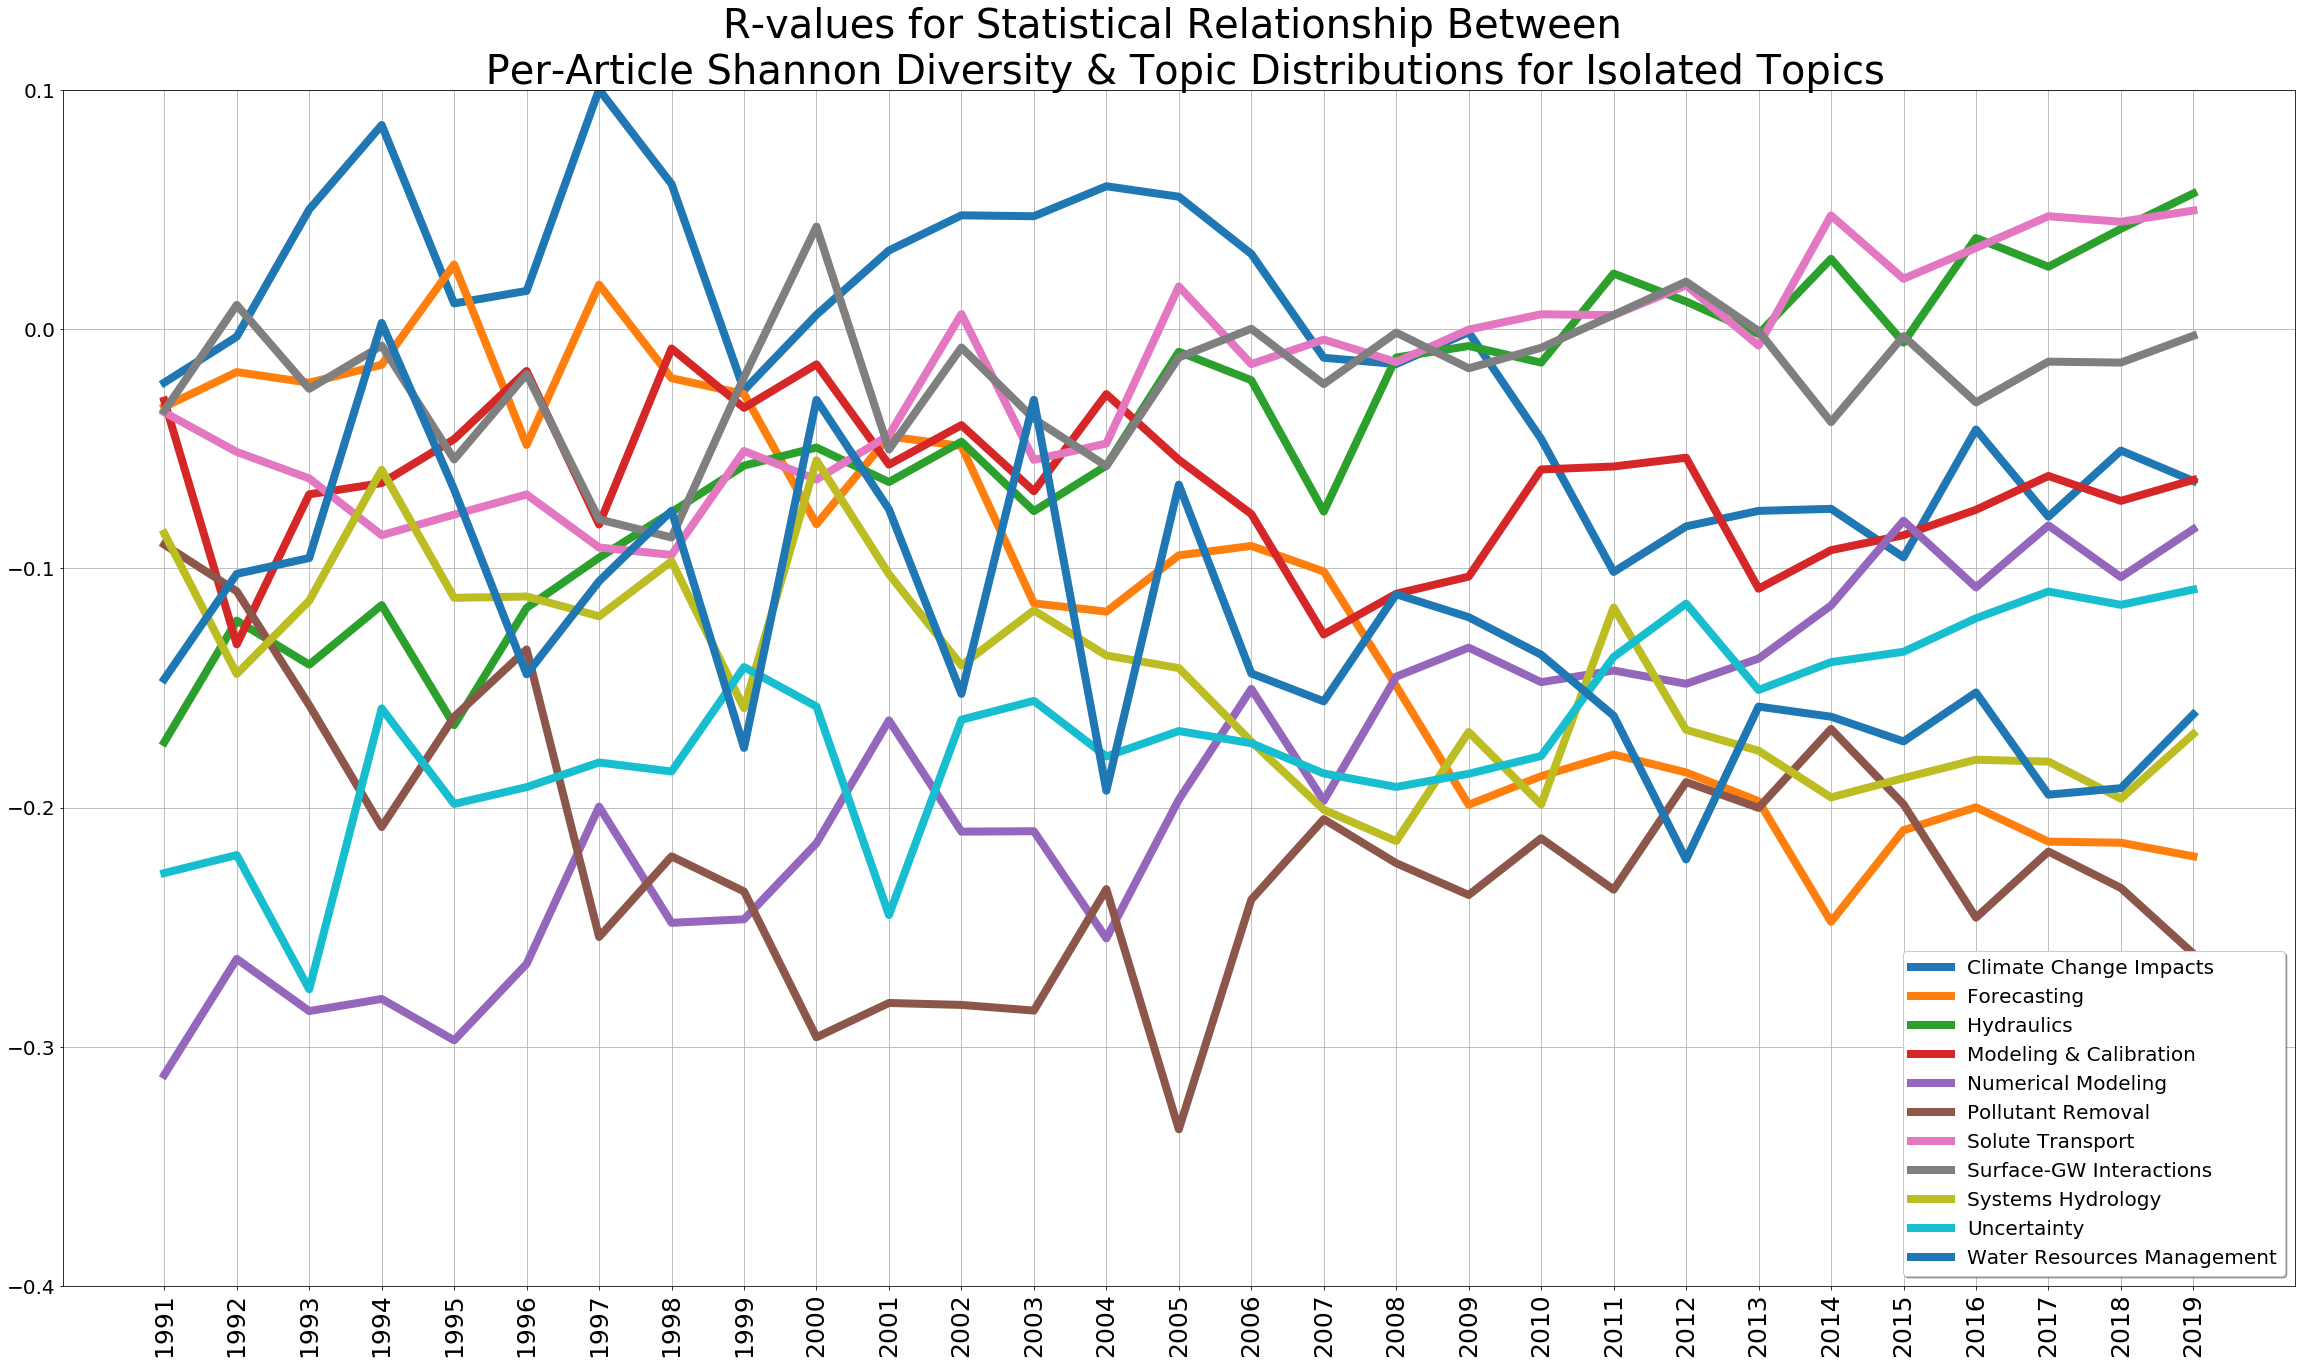

In [38]:
# Statistical Relationship Between Per-Article Shannon Diversity & Topic Distributions for Isolated Topics

isolated_dict = {}

for year in years:
    isolated_dict[year] = {}
    for isolated in isolated_list:
        isolated_dict[year][isolated] = year_diversity_correlation_dict['shannon'][year][isolated]


df = pd.DataFrame(isolated_dict).transpose()
plt.figure(figsize=(40,22))
plt.plot(df[:-1], linewidth = 8)
plt.xticks(size = 25, rotation = 90)
plt.yticks(size = 20)
plt.ylim(-0.4, 0.1)
plt.legend(df, prop={'size': 20}, loc = 'best', shadow = True, fancybox = True)
plt.grid()
plt.title('R-values for Statistical Relationship Between \n Per-Article Shannon Diversity & Topic Distributions for Isolated Topics', size = 40)
plt.savefig('figures/isolated_trend_shannon.png')


In [39]:
#calculating statistical significance of the above relationships

# top = 'Hydraulics'
# print(top)
# pg.corr(np.array(range(0,29,1)), np.array(df[top])[:-1])

Hydraulics


n         r         CI95%        r2    adj_r2         p-val  \
pearson  29  0.942028  [0.88, 0.97]  0.887416  0.878756  2.519022e-14   

              BF10  power  
pearson  1.918e+11    1.0

In [40]:
isolated_dict_journal = {}

for journal in journals:
    isolated_dict_journal[journal] = {}
    for isolated in isolated_list:
        isolated_dict_journal[journal][isolated] = journal_diversity_correlation_dict['shannon'][journal][isolated]


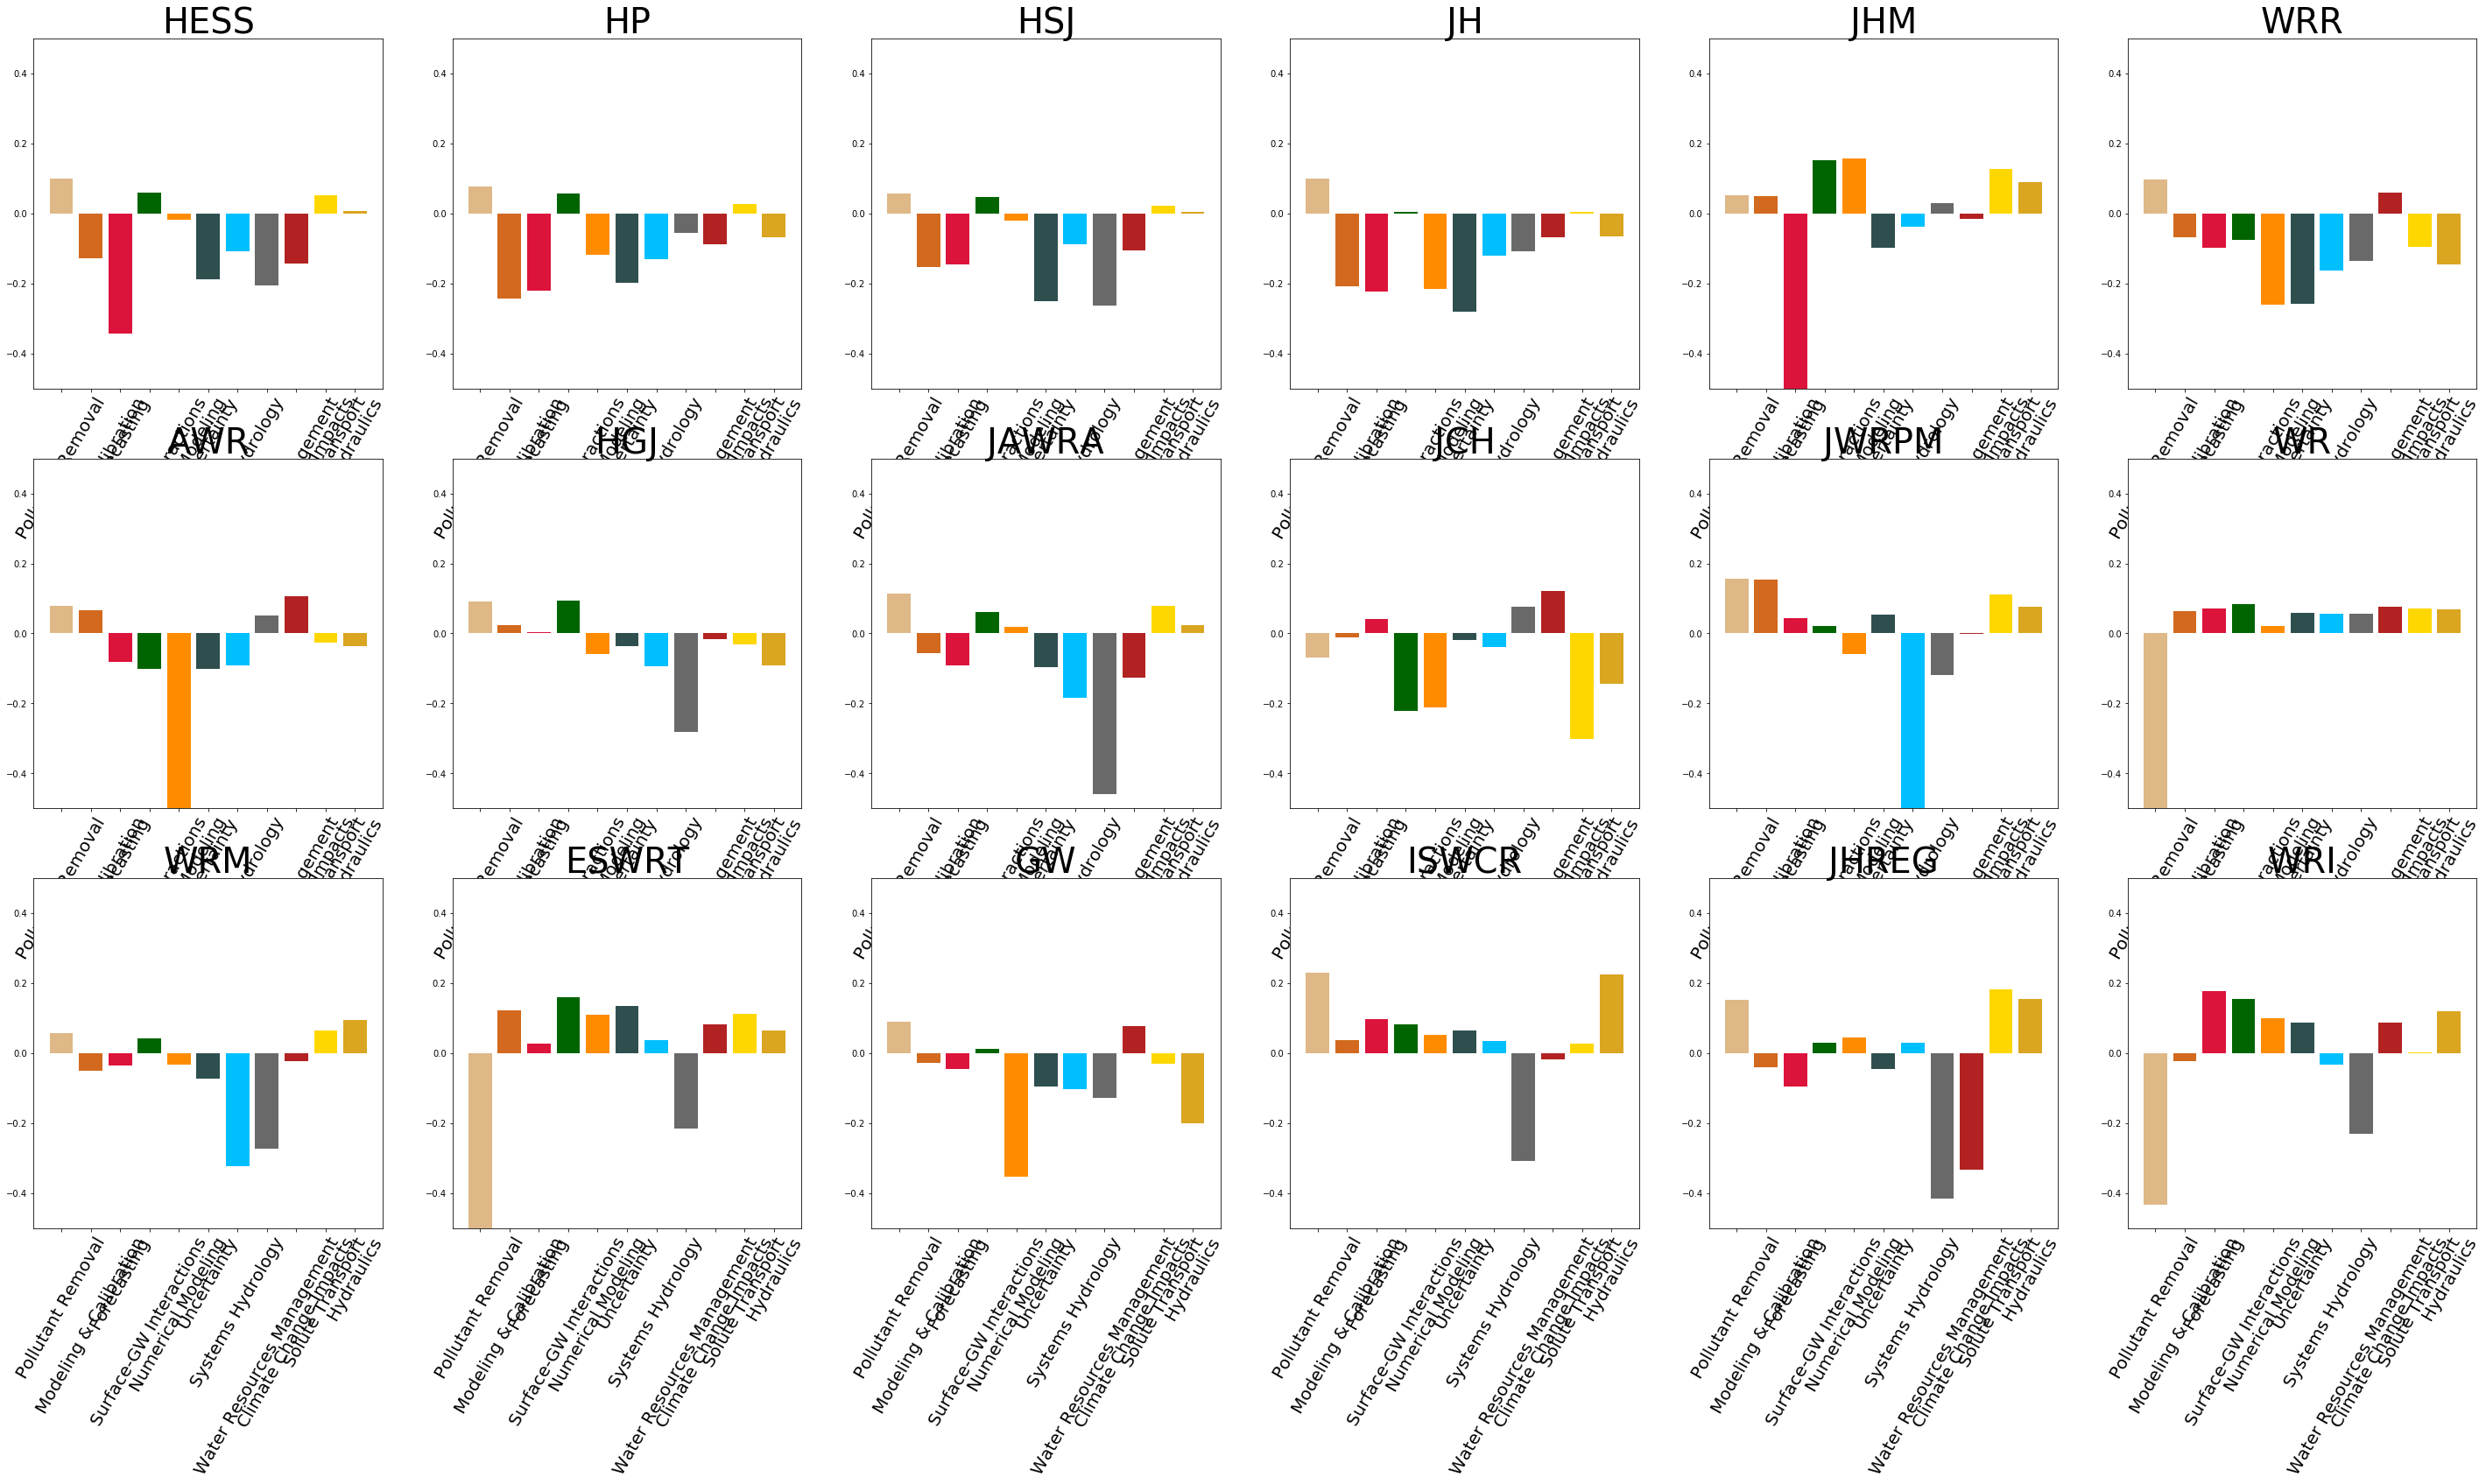

In [41]:
fig = plt.figure(figsize=(50,25), facecolor='white')


# plot numbering starts at 1, not 0
plot_number = 1

for journal in journals:
    ax = fig.add_subplot(3, 6, plot_number)
    ax.bar(isolated_list, isolated_dict_journal[journal].values(), color = list(custom_colors.values()))
    ax.tick_params(axis="x", labelsize=20)
    ax.tick_params(axis="y", labelsize=10)
    ax.set_ylim(-0.5,0.5)
    ax.set_title(journal, size = 40)
    plt.xticks(rotation=60)
    # Go to the next plot for the next loop
    plot_number = plot_number + 1
plt.savefig('figures/isolated_journal_shannon.png')

In [42]:
isolated_dict_global = {}

for metric in diversity_metrics:
    isolated_dict_global[metric] = {}
    for isolated in isolated_list:
        isolated_dict_global[metric][isolated] = r_vals_global[metric][isolated]


KeyError: 'gini-simpson'

In [ ]:
#plot r values for global diversity & topic distributions

fig = plt.figure(figsize=(100,60), facecolor='white')


# plot numbering starts at 1, not 0
plot_number = 1

for metric in diversity_metrics_3:
    ax = fig.add_subplot(1, 3, plot_number)
    ax.bar(isolated_list, isolated_dict_global[metric].values(), color = list(custom_colors.values()))
    ax.tick_params(axis="x", labelsize=70)
    ax.tick_params(axis="y", labelsize=100)
    ax.set_ylim(-0.3,0.3)
    ax.set_title(metric, size = 150)
    plt.xticks(rotation=90)
    # Go to the next plot for the next loop
    plot_number = plot_number + 1
    
plt.tight_layout()
plt.savefig('figures/r_global_isolated.png')    

In [ ]:
#  fig = plt.figure(figsize=(250,150), facecolor='white')


# # plot numbering starts at 1, not 0
# plot_number = 1

# for year in years:
#     ax = fig.add_subplot(6, 5, plot_number)
#     ax.bar(topic_names_short, year_diversity_correlation_dict['gini-simpson'][year].values(), color = list(custom_colors.values()))
#     ax.tick_params(axis="x", labelsize=25)
#     ax.tick_params(axis="y", labelsize=100)
#     ax.set_ylim(-0.5,0.5)
#     ax.set_title(year, size = 150)
#     # Go to the next plot for the next loop
#     plot_number = plot_number + 1

# plt.tight_layout()
# plt.savefig('figures/r_gini_allyears.png')   

In [ ]:
#  fig = plt.figure(figsize=(250,150), facecolor='white')


# # plot numbering starts at 1, not 0
# plot_number = 1

# for year in years:
#     ax = fig.add_subplot(6, 5, plot_number)
#     ax.bar(topic_names_short, year_diversity_correlation_dict['spRich'][year].values(), color = list(custom_colors.values()))
#     ax.tick_params(axis="x", labelsize=25)
#     ax.tick_params(axis="y", labelsize=100)
#     ax.set_ylim(-0.5,0.5)
#     ax.set_title(year, size = 150)
#     # Go to the next plot for the next loop
#     plot_number = plot_number + 1

# plt.tight_layout()
# plt.savefig('figures/r_sprich_allyears.png')   

In [ ]:
#  fig = plt.figure(figsize=(250,150), facecolor='white')


# # plot numbering starts at 1, not 0
# plot_number = 1

# for year in years:
#     ax = fig.add_subplot(6, 5, plot_number)
#     ax.bar(topic_names_short, year_diversity_correlation_dict['dominance'][year].values(), color = list(custom_colors.values()))
#     ax.tick_params(axis="x", labelsize=25)
#     ax.tick_params(axis="y", labelsize=100)
#     ax.set_ylim(-0.5,0.5)
#     ax.set_title(year, size = 150)
#     # Go to the next plot for the next loop
#     plot_number = plot_number + 1

# plt.tight_layout()
# plt.savefig('figures/r_dominance_allyears.png')   

In [ ]:
#Create a dictionary of [metric][journal][topic][weights]
# journal_year_diversity_correlation_dict = {}


    
# for metric in diversity_metrics:

#     journal_year_diversity_correlation_dict[metric] = {}
    
#     for journal in journals:
        
#         journal_year_diversity_correlation_dict[metric][journal] = {}
            
#         for y, year in enumerate(years):

#             journal_year_diversity_correlation_dict[metric][journal][year] = {} 

#             for t, topic in enumerate(topic_names):

#                 journal_year_diversity_correlation_dict[metric][journal][year][topic] = np.corrcoef(topic_distributions_journal_year[journal][year][:,t],year_diversity[metric][year])[0,1]
            

In [ ]:
#calculate global intertopic correlations and store them in an dictionary
global_intertopic_corr = {}

for t1, topic in enumerate(topic_names):
    global_intertopic_corr[t1] = {}
    for t2, topic in enumerate(topic_names):
        global_intertopic_corr[t1][t2] = np.corrcoef(topic_distributions[:,t1],topic_distributions[:,t2])[0,1]
    

In [ ]:
global_intertopic_corr[1]

In [ ]:
#initiate individual lists for nodes and links
node_list = []
link_list = []

# dist_values = np.full([corpus_df.shape[0], corpus_df.shape[0]], np.nan)
# dist_values = np.full([1000, 1000], -0.1)
    
for t1, topic in enumerate(topic_names):
    
    grp = {"group" : t1, "name": topic}
    node_list.append(grp)
    
    for t2, topic in enumerate(topic_names):
        if t1 == t2:
            dist = 0
        else:
            dist = global_intertopic_corr[t1][t2]
            link = {"source": t1, "target": t2, "value": dist}
            link_list.append(link)
            continue


In [ ]:
link_arr = np.array(link_list)
node_arr = np.array(node_list)

In [ ]:
np.save('link_array', link_arr, allow_pickle=True, fix_imports=True)
np.save('node_array', node_arr, allow_pickle=True, fix_imports=True)

In [ ]:
#initiate json file
json_prep = {"links":link_list, "nodes":node_list}
# json_prep = {"links":link_list}
#json does not recognize NumPy data types; defining own encoder
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(NpEncoder, self).default(obj)

#dumping the data into json file
json_dump = json.dumps(json_prep, indent=1, sort_keys=True, cls=NpEncoder)

#save output
filename_out = 'topic_correlation.json'
json_out = open(filename_out,'w')
json_out.write(json_dump)
json_out.close()

In [ ]:
#Creating an array of yearwise mean diversity

div_list = []
for y, year in enumerate(years):
    div_list.append(np.mean(year_diversity['shannon'][year]))
div_arr = np.array(div_list)


In [ ]:
#Performing regression analysis
result = stats.linregress(y_arr[:-1], div_arr[:-1])
print('R:',result.rvalue)
print('R-squared:',result.rvalue**2)

In [ ]:
#BF10 - Bayes Factor in favor of the alternative hypothesis. Alternative hypothesis predicts the result
#7.677 times better than the null hypothesis
#power - 1.0 - type II error because of the small size
plt.plot(y_arr[:-1], div_arr[:-1], 'o', label='original data')
plt.plot(y_arr, result.intercept + result.slope*y_arr, 'r', label='fitted line')
plt.legend()
plt.show()
pg.corr(y_arr[:-1], div_arr[:-1])

In [ ]:
#Calculate 95% confidence interval on slope
# Two-sided inverse Students t-distribution
# p - probability, df - degrees of freedom

# tinv = lambda p, df: abs(t.ppf(p/2, df))

# ts = tinv(0.05, len(y_arr[:-1])-2)
# print(f"slope (95%): {result.slope:.6f} +/- {ts*result.stderr:.6f}")